In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

In [9]:
image_height = 1600
image_width = 1200
dpi = 100

In [10]:
urls = [
    f"https://placekitten.com/{image_width}/{image_height}"
    ]

In [11]:
images = list()

for url in urls:
    image = io.imread(url)
    images.append(image)

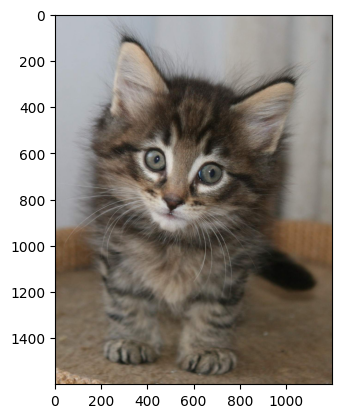

In [12]:
img = images[0]
plt.imshow(img)

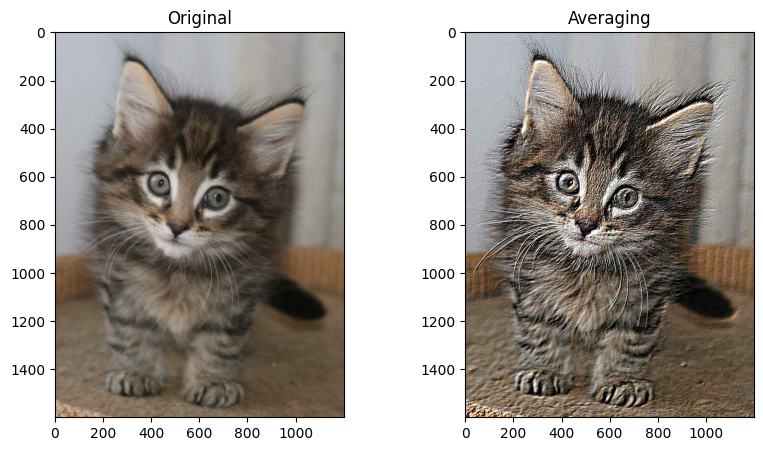

In [43]:
color_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



kernel_size = 1
kernel = np.array([
  [-7, -1, 0],
  [-1, 1, 1],
  [0, 1, 7]
])

"""
blurred = cv2.GaussianBlur(img, (3, 99), 0)
"""
dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(dst), plt.title('Averaging')
plt.show()
